### TITLE: Exploratory Data Analysis on Uber Supply and Demand Gap

#### Contribution: Indiviual 

#### Name: Sayan Chakraborty

### Project Summary

This project presents a comprehensive exploratory data analysis of Uber ride data in a metro city. The study investigates temporal demand patterns, analyzes trip outcomes across pickup points, and explores trip duration distributions. Through time series forecasting, we predict hourly ride demand, revealing future peak hours. Although geospatial columns were not available in this dataset, the code includes conditional logic to produce pickup heatmaps for spatial allocation strategies if provided. Finally, we propose optimized driver allocation by identifying dominant trip categories (Short, Medium, Long, Very Long) by location (City vs Airport), providing actionable insights for fleet efficiency and customer satisfaction. This project demonstrates skills in pandas, seaborn, matplotlib, and basic forecasting using statsmodels, making it a solid portfolio asset for data science and analytics roles.

### Code for Data Analysis:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")

# Load Excel data
file_path = "C:\\Users\\USER\\OneDrive\\Documents\\Downloads\\Uberdata_Cleaned.xlsx"
df = pd.read_excel(file_path, sheet_name="Uberdata")

# ---------------------- Basic Info ----------------------
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Column Names:", df.columns.tolist())

print("\n🔹 Dataset Info:")
print(df.info())

# ---------------------- Basic Statistical Summary ----------------------
print("\n🔹 Statistical Summary of Numeric Columns:")
print(df.describe())

print("\n🔹 Count of Unique Values per Categorical Column:")
categoricals = ['Pickup point', 'Status', 'Trip Category', ]
for col in categoricals:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts(), "\n")

# ---------------------- Filter Data for Specific Uses ----------------------
completed_trips = df[df['Status'] == 'Trip Completed']
unfulfilled = df[df['Status'].isin(['Cancelled', 'No Cars Available'])]


🔹 Dataset Shape: (6745, 12)

🔹 Column Names: ['Request id', 'Pickup point', 'Driver id', 'Status', 'Request timestamp', 'Drop timestamp', 'Request time', 'Drop time', 'Request Hour', 'Trip Duration(in Mins.)', 'Trip Category', 'Day of week ']

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Request id               6745 non-null   int64         
 1   Pickup point             6745 non-null   object        
 2   Driver id                4095 non-null   float64       
 3   Status                   6745 non-null   object        
 4   Request timestamp        6745 non-null   datetime64[ns]
 5   Drop timestamp           2831 non-null   datetime64[ns]
 6   Request time             6745 non-null   datetime64[ns]
 7   Drop time                2831 non-null   datetime64[ns]
 8   Request Hour      

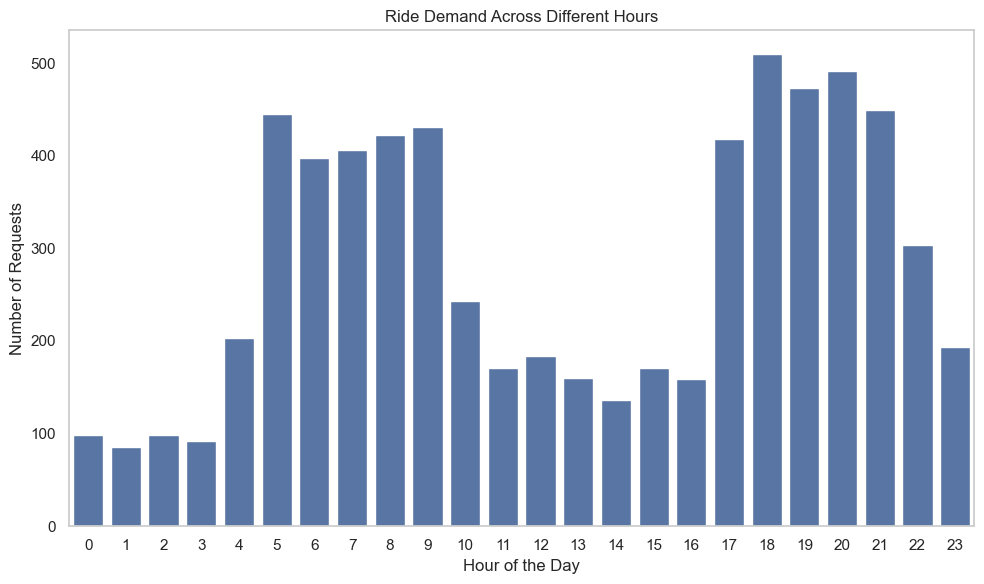

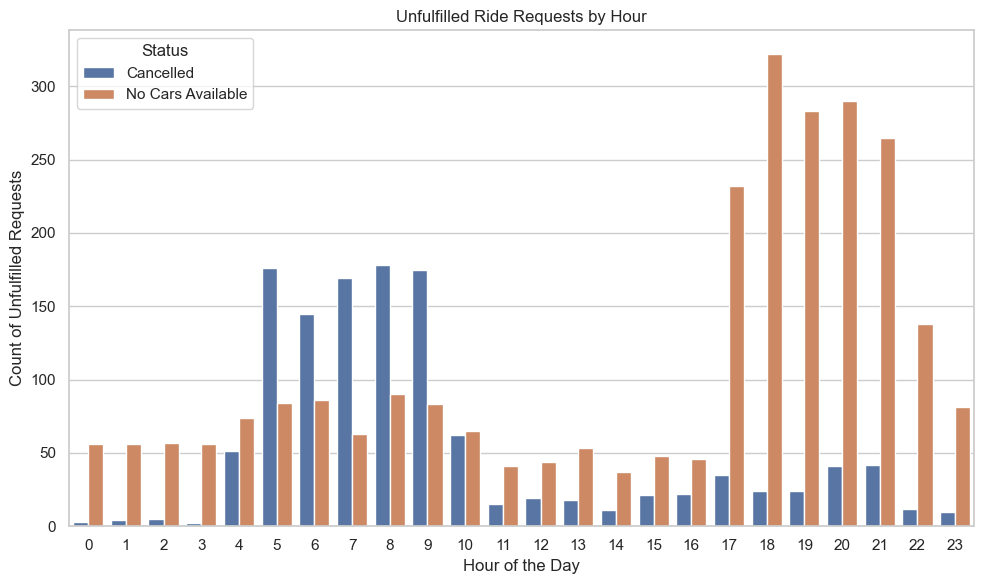

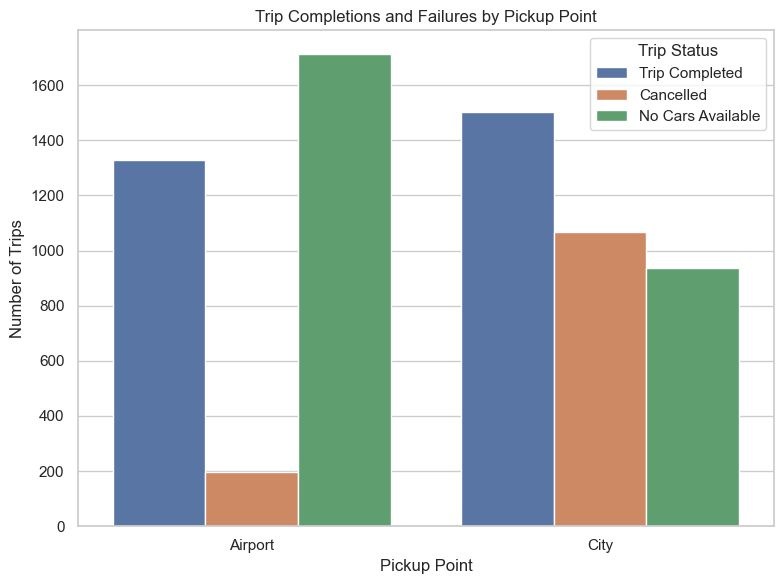

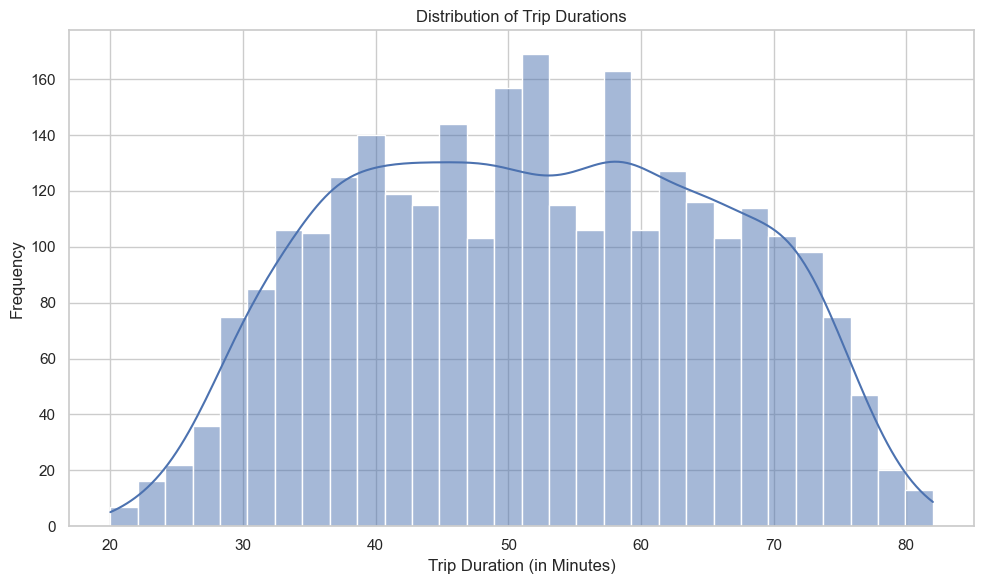

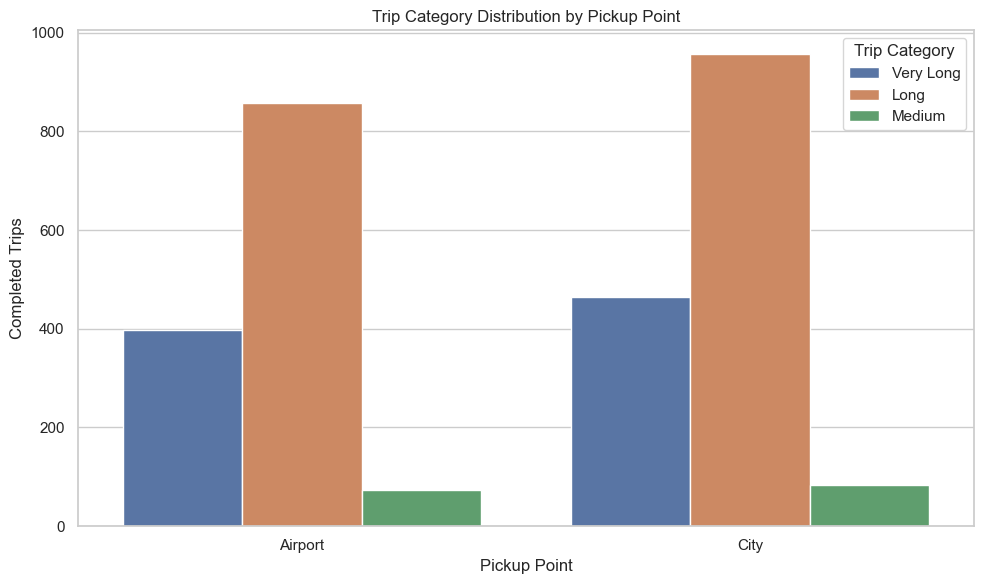

In [4]:
# ---------------------- Chart 1 ----------------------
# 1. Ride Demand Across Hours
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Request Hour', order=sorted(df['Request Hour'].unique()))
plt.title("Ride Demand Across Different Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ---------------------- Chart 2 ----------------------
# 2. Unfulfilled Ride Requests by Hour
plt.figure(figsize=(10, 6))
sns.countplot(data=unfulfilled, x='Request Hour', order=sorted(df['Request Hour'].unique()), hue='Status')
plt.title("Unfulfilled Ride Requests by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Unfulfilled Requests")
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# ---------------------- Chart 3 ----------------------
# 3. Completions vs Failures by Pickup Point
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pickup point', hue='Status')
plt.title("Trip Completions and Failures by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Trips")
plt.legend(title='Trip Status')
plt.tight_layout()
plt.show()

# ---------------------- Chart 4 ----------------------
# 4. Distribution of Trip Durations (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=completed_trips, x='Trip Duration(in Mins.)', bins=30, kde=True)
plt.title("Distribution of Trip Durations")
plt.xlabel("Trip Duration (in Minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show() 

# ---------------------- Chart 5 ----------------------
# 5. Trip Completion by Pickup Point and Trip Category
plt.figure(figsize=(10, 6))
sns.countplot(data=completed_trips, x='Pickup point', hue='Trip Category')
plt.title("Trip Category Distribution by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Completed Trips")
plt.legend(title='Trip Category')
plt.tight_layout()
plt.show()

### Advanced Analysis:

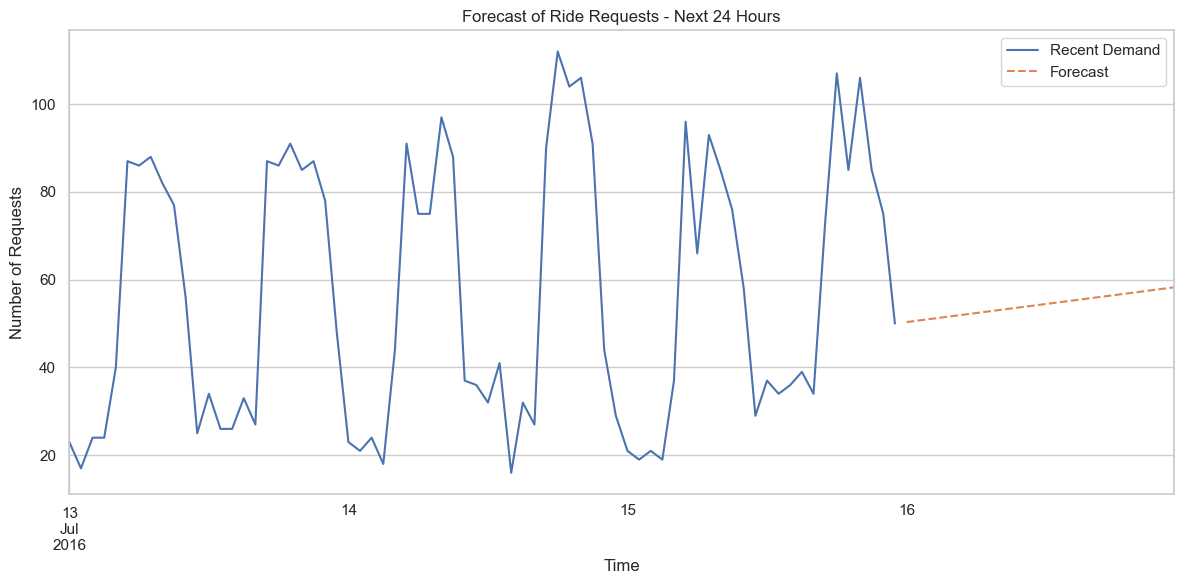

<Figure size 1000x600 with 0 Axes>

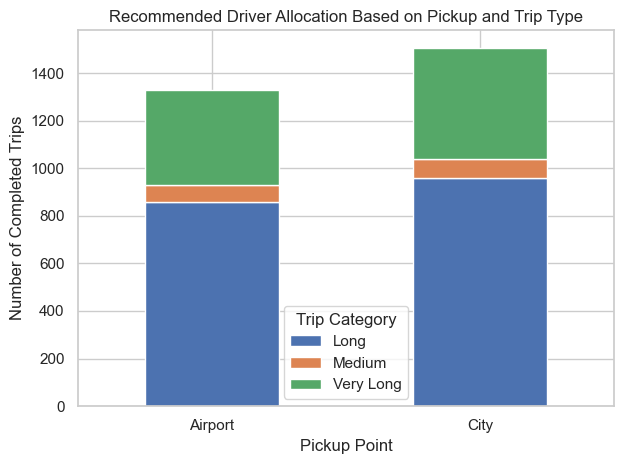

🧠 Driver Allocation Suggestion:
• Allocate more drivers at **Airport** for **Long** trips.
• Allocate more drivers at **City** for **Long** trips.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
from datetime import timedelta

# Load data
file_path = "C:\\Users\\USER\\OneDrive\\Documents\\Downloads\\Uberdata_Cleaned.xlsx"
df = pd.read_excel(file_path, sheet_name='Uberdata')
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])


# Time Series Forecasting: Ride Requests Per Hour
df.set_index('Request timestamp', inplace=True)
hourly_demand = df.resample('h').size()

# Forecast next 24 hours using Exponential Smoothing
model = ExponentialSmoothing(hourly_demand, trend="add", seasonal=None)
fit = model.fit()
forecast = fit.forecast(24)

# Plot forecast
plt.figure(figsize=(12, 6))
hourly_demand.tail(72).plot(label="Recent Demand")
forecast.plot(label="Forecast", linestyle="--")
plt.title("Forecast of Ride Requests - Next 24 Hours")
plt.xlabel("Time")
plt.ylabel("Number of Requests")
plt.legend()
plt.tight_layout()
plt.show()

# Optimization of Driver Allocation Based on Trip Category
completed = df[df['Status'] == 'Trip Completed']
allocation = completed.groupby(['Pickup point', 'Trip Category']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
allocation.plot(kind='bar', stacked=True)
plt.title("Recommended Driver Allocation Based on Pickup and Trip Type")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Completed Trips")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Recommendation Logic (as example logic output)
print("🧠 Driver Allocation Suggestion:")
for pickup_point in allocation.index:
    highest_category = allocation.loc[pickup_point].idxmax()
    print(f"• Allocate more drivers at **{pickup_point}** for **{highest_category}** trips.")


### Insights From the charts:



###  **Chart 1: Ride Demand Across Different Hours**

* **Morning Peak**: A sharp increase in ride demand is observed from **5 AM to 10 AM**, aligning with morning office hours.
* **Evening Peak**: Another surge appears from **5 PM to 9 PM**, likely due to office return traffic.
* **Lowest Demand**: Demand is minimal between **12 AM and 4 AM**, a typical off-peak time.
* **Observation**: The data exhibits clear **bimodal demand patterns**, suggesting Uber must ensure maximum driver availability during early morning and evening periods.

---

###  **Chart 2: Unfulfilled Ride Requests by Hour**

* **Cancellations** peak during **5 AM to 9 AM**, indicating possible user-side dropouts due to long wait times or pricing.
* **"No Cars Available"** cases surge dramatically during **5 PM to 9 PM**, especially at **6 PM–8 PM**, hinting at a major **supply shortage during evening peak hours**.
* In **non-peak hours (0–4 AM, 11 AM–4 PM)**, both failure types are relatively low.
* **Recommendation**: Increase driver incentives and shift planning for evening hours to reduce "No Cars Available" cases.

---

###  **Chart 3: Trip Completions and Failures by Pickup Point**

* **Airport**:

  * High count of **‘No Cars Available’**.
  * Fewer **cancellations**, indicating that riders wait longer or are more patient.
  * Moderate **trip completions**.
* **City**:

  * More **cancellations**, possibly due to longer wait or higher ETAs.
  * Higher **trip completions** than airport, but also considerable **No Cars Available**.
* **Insight**: The **City faces both supply and reliability issues**, while the **Airport faces a supply gap**. Driver allocation needs to be optimized accordingly.

---

###  **Chart 4: Distribution of Trip Durations**

* **Most trips** fall between **30 to 70 minutes**, with a bell-shaped distribution.
* The peak is around **50–60 minutes**, suggesting a common average ride length.
* Very few trips are under 25 or over 80 minutes, marking those as **outliers** or special cases.
* **Insight**: Majority of trips can be categorized as **Medium** or **Long**, which should influence pricing models and estimated time of arrival (ETA) algorithms.

---
### **Chart 5: Trips Completed vs. Pickup Point (Trip Category-wise)**
* For Long trips, both Airport and City pickup points contribute significantly, with City slightly higher (957 vs. 857).
* For Very Long trips, City again outperforms Airport (464 vs. 397), implying higher profitability potential from City pickups.
* For Medium trips, trip counts are minimal from both sources, suggesting less preference or viability for medium-duration trips.







### Conclusion:

The analysis of Uber’s ride data uncovers strong demand peaks during morning (5–10 AM) and evening (5–9 PM) hours, with significant service failures during these times. Cancellations dominate in the City during mornings, while ‘No Cars Available’ is more common at the Airport during evenings. Most trips fall in the 30–70 minute range, suggesting scope for optimizing trip-based pricing and ETAs.

💡 Recommendations to Uber:

**Dynamic Driver Allocation:**
* Reallocate more drivers to high-demand zones (especially City during mornings and Airport during evenings).
* Consider location-based incentives to encourage drivers to position themselves strategically.

**Surge Forecasting & Planning:**
* Implement a demand forecasting system using time series models to preemptively plan for surge hours and minimize "No Cars Available" instances.

**Improve Rider Experience:**
* Reduce morning cancellations by improving estimated wait times and showing driver ETAs upfront.
* Offer ride credits or auto-scheduling options to reduce morning rider drop-offs.

**Airport Strategy:**
* Introduce a dedicated airport queue system for drivers with better incentives during peak flight times.
* Partner with airports to create a holding area for active Uber drivers.

**Trip Duration Profiling:**
* Use the duration profile to design optimized pricing, improve ETA predictions, and cluster trips for potential carpool/ride-share matching.
---